# СТАТИСТИЧЕСКИЕ МЕТОДЫ ОБРАБОТКИ ДАННЫХ. ОПРЕДЕЛЕНИЕ ОСНОВНЫХ СТАТИСТИЧЕСКИХ ХАРАКТЕРИСТИК

**Цель работы:** – научиться вычислять основные статистические характеристики выборки.
Условие представляет из себя вариационный ряд из 100 элементов (результат некоторого эксперимента).

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF 
array = np.array([17.1, 21.4, 15.9, 19.1, 22.4, 20.7, 17.9, 18.6, 21.8, 16.1, 19.1, 20.5, 
                  14.2, 16.9, 17.8, 18.1, 19.1, 15.8, 18.8, 17.2, 16.2, 17.3, 22.5, 19.9, 
                  21.1, 15.1, 17.7, 19.8, 14.9, 20.5, 17.5, 19.2, 18.5, 15.7, 14.0, 18.6, 
                  21.2, 16.8, 19.3, 17.8, 18.8, 14.3, 17.1, 19.5, 16.3, 20.3, 17.9, 23.0, 
                  17.2, 15.2, 15.6, 17.4, 21.3, 22.1, 20.1, 14.5, 19.3, 18.4, 16.7, 18.2, 
                  16.4, 18.7, 14.3, 18.2, 19.1, 15.3, 21.5, 17.2, 22.6, 20.4, 22.8, 17.5, 
                  20.2, 15.5, 21.6, 18.1, 20.5, 14.0, 18.9, 16.5, 20.8, 16.6, 18.3, 21.7
])


## Задание 1


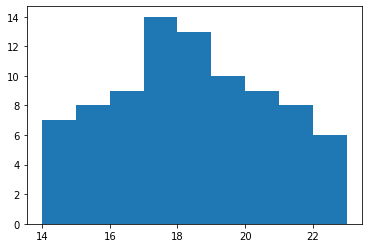

In [5]:
plt.hist(array, 9);

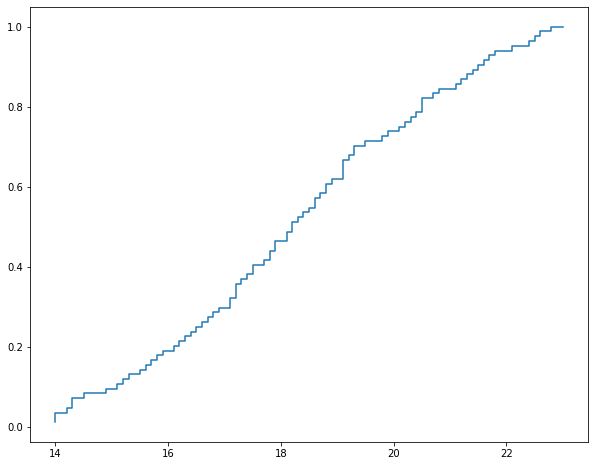

In [6]:
ecdf = ECDF(array)
plt.figure(figsize=(10,8))
plt.step(ecdf.x,ecdf.y);

## Задание 2 - Статистические характеристики
* Среднее - сумма всех значений выборки, делённая на их количество;
* Медиана - значение, которое находится в середине выборки (если она нечётной длины) или среднее двух центральных значений (если она чётной длины);
* Мода - наиболее часто встречающееся значение (или значения);
* Дисперсия - мера разброса величины относительно матожидания;
* Стандартное отклонение - квадратный корень из дисперсии;
* Первый квартиль - значение, меньше которого 25% значений выборки;
* Второй квартиль - значение, меньше которого 50% значений выборки (это, внезапно, медиана);
* Третий квартиль - значение, меньше которого 75% значений выборки;
* Минимум - наименьшее значение в выборке;
* Максимум - наибольшее значение в выборке;
* Стандартная ошибка - то, насколько отличается выборочное среднее от среднего генеральной совокупности;
* Эксцесс - мера остроты пика распределения случайной величины;
* Асимметрия - величина, характеризующая асимметрию распределения данной случайной величины.


Среднее: 18.357142857142854
Медиана: 18.25
Мода: 19.1
Дисперсия: 5.46530612244898

Стандартное отклонение: 2.337799418780187

Первый квартиль: 16.674999999999997
Второй квартиль: 18.25
Третий квартиль: 20.224999999999998

Минимум: 14.0
Максимум: 23.0

Стандартная ошибка: 0.2566068232067354
Эксцесс: -0.8075278261005359
Асимметрия: 0.054673096752064373



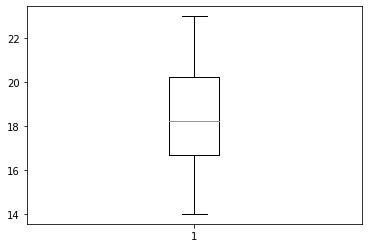

In [8]:
print("Среднее:", np.mean(array))
print("Медиана:", np.median(array))
print("Мода:", stats.mode(array).mode[0])
print("Дисперсия:", np.var(array))
print("")

print("Стандартное отклонение:", np.std(array))
print() 

print("Первый квартиль:", np.percentile(array, 25))
print("Второй квартиль:", np.percentile(array, 50))
print("Третий квартиль:", np.percentile(array, 75))
print()

print("Минимум:", np.min(array))
print("Максимум:", np.max(array))
print() 

print("Стандартная ошибка:", stats.sem(array))
print("Эксцесс:", stats.kurtosis(array)) 
print("Асимметрия:", stats.skew(array))
print()
plt.boxplot(array);

## Задание 3. Проверка гипотезы о нормальностираспределения критерием Пирсона

Достаточно найти хи-квадрат наблюдаемое и критическое. Так как наблюдаемое меньше критического, то гипотеза о нормальности не отвергается.

In [9]:
print("Хи-квадрат наблюдаемое:", stats.chisquare(array).statistic)
print("Хи-квадрат критическое:", stats.chi2.isf(0.025, 81))


Хи-квадрат наблюдаемое: 25.00856031128405
Хи-квадрат критическое: 107.78340966533453


## Задание 4. Поиск доверительных интервалов

**Доверительным интервалом** называют интервал, рассчитанный из данных таким образом, что существует известная вероятность включения интересующего вас (неизвестного) параметра генеральной совокупности в интервал, и эта вероятность интерпретируется с точки зрения случайного эксперимента начинающегося с извлечения случайной выборки.

В данном случае мы можем сказать, что матожидание и дисперсия с вероятностью 95% лежат в полученных интервалах.

In [18]:
print("Доверительный интервал для матожидания:", 
      stats.t.interval(0.95, len(array)-1, loc=np.mean(array), scale=stats.sem(array)))

Доверительный интервал для матожидания: (17.846762206514377, 18.86752350777133)


In [19]:
print("Доверительный интервал для дисперсии: ", 
      stats.t.interval(0.95, len(array)-1, loc=np.var(array), scale=stats.sem(array)))


Доверительный интервал для дисперсии:  (4.954925471820502, 5.975686773077458)
